# Trash Classification using Convolutional Neural Network

This classification task utilizes the trash dataset available on Hugging Face (`https://huggingface.co/datasets/garythung/trashnet`). A Convolutional Neural Network (CNN), a type of machine learning algorithm, will be used to build the model. The dataset includes six classes: trash, plastic, cardboard, metal, paper, and glass.


## 1. Load Data

  In this step, the dataset is loaded into the working environment for further processing. The data is uploaded to Google Drive for accessibility, and the os library is used to programmatically manage and load the files. This step ensures the dataset is available for subsequent preprocessing and analysis.

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# get the data
data_dir = '/content/drive/My Drive/dataset-resized/'
os.listdir(data_dir)

['metal', 'paper', 'plastic', 'cardboard', 'glass', 'oversampling_trash']

## 2. Data Exploration

  Data exploration is essential to gain insights into the dataset and ensure it is well-suited for the classification task. In this step, the dataset is analyzed to determine the number of classes (e.g., trash, plastic, cardboard), the number of images in each class to check for class imbalances, and the visual characteristics of the images. This process may involve:
  - Counting the images for each label to assess balance or imbalance in the dataset.
  - Displaying sample images from different classes to understand their visual patterns and variations.
  - Identifying potential issues, such as poor image quality or mislabeled data, that may need to be addressed in preprocessing.

This step helps to develop a clear understanding of the dataset and informs decisions for the preprocessing and model design stages.

In [ ]:
path = []
labels = []
shapes = []

for data in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, data)):
      path.append(os.path.join(data_dir, data, img))
      labels.append(data)

      img_array = cv2.imread(os.path.join(data_dir, data, img))
      shapes.append(img_array.shape)


df_new = pd.DataFrame()
df_new['path'] = path
df_new['label'] = labels
df_new['shape'] = shapes
df_new['label'].value_counts()

,count
label,
paper,594
glass,501
plastic,482
metal,414
cardboard,403
trash,137


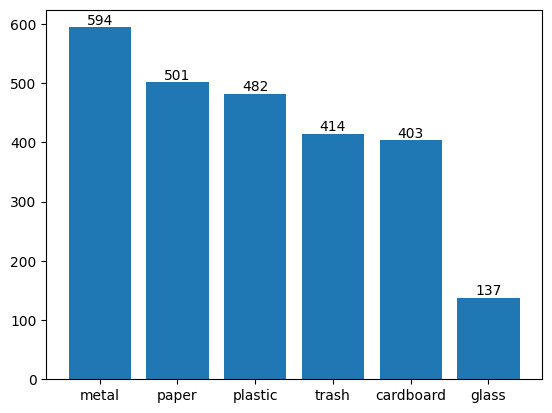

In [ ]:
bar_chart = plt.bar(df_new['label'].unique(), df_new['label'].value_counts())
plt.bar_label(bar_chart)
plt.show()

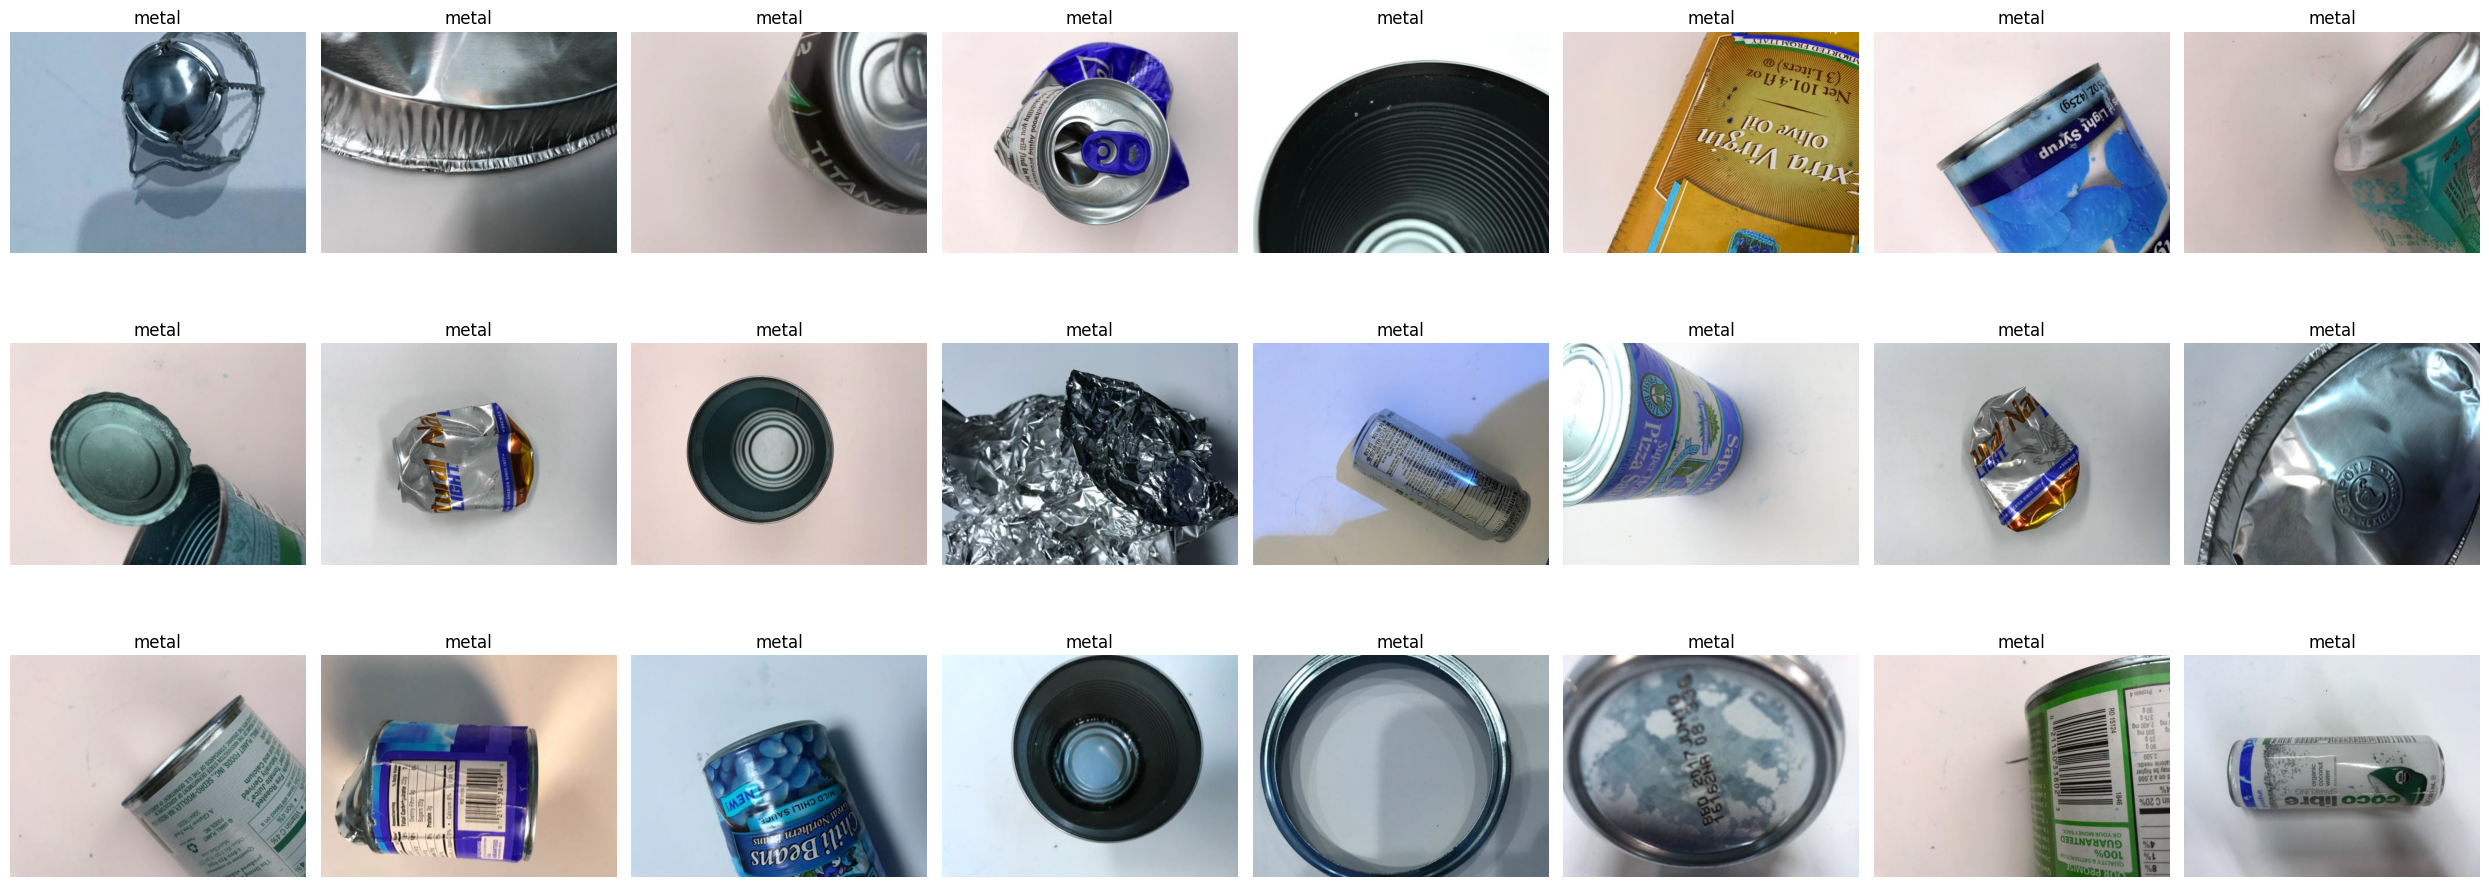

In [ ]:
imgPaths = df_new['path']
fig, axs = plt.subplots(3, 8, figsize=(25, 10))

axs = axs.flatten()

for ax,imgPath in zip(axs , imgPaths):
    label = str(imgPath).split('/')[-2]    # extract label of an imgae from a path
    img = cv2.imread(imgPath)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

## 3. Data Preprocessing

Data preprocessing is a vital step to ensure the dataset is clean, consistent, and ready for training. For this project, the following tasks are carried out:
 - Balancing the Data: Address class imbalances by techniques such as oversampling minority classes or undersampling majority classes to ensure the model does not favor certain classes disproportionately.
 - Standardizing Image Format: Resize all images to a uniform size and normalize pixel values (e.g., scaling pixel intensities between 0 and 1) to ensure compatibility with the model and improve training efficiency.

By performing these tasks, preprocessing reduces potential biases and ensures the model can learn effectively from the dataset.

### Oversampling

This step involves oversampling to balance the dataset. The number of images in the "trash" class is significantly lower than in other classes, which could lead to suboptimal model performance. Oversampling is used to increase the number of images in the "trash" class, ensuring a more balanced dataset.

**Why not use undersampling instead of oversampling?**
Undersampling is not suitable in this case because the gap between the "trash" class and other classes is large. Reducing the number of images in other classes could lead to the loss of important information, negatively impacting the model's ability to learn from all classes. Therefore, oversampling is a more compatible technique for this situation.

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
import random
from shutil import copy2

In [23]:
original_dir = '/content/drive/My Drive/dataset-resized/trash'
augmented_dir = '/content/drive/My Drive/dataset-resized/oversampling_trash'

In [24]:
os.makedirs(augmented_dir, exist_ok=True)

In [25]:
# Image Data Generator for Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# load the tras image
images = [os.path.join(original_dir, img) for img in os.listdir(original_dir)]

current_count = len(images)
target_count = 590

In [26]:
while current_count < target_count:
    # Randomly select an image to augment
    img_path = random.choice(images)
    img = tf.keras.preprocessing.image.load_img(img_path)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape for generator

    # Generate a new augmented image
    for batch in datagen.flow(img_array, batch_size=1, save_to_dir=augmented_dir, save_prefix="aug", save_format="jpg"):
        current_count += 1
        print(f"Generated image: {current_count}/{target_count}")
        break  # Break after generating one image

print("Oversampling completed.")

Generated image: 138/590
Generated image: 139/590
Generated image: 140/590
Generated image: 141/590
Generated image: 142/590
Generated image: 143/590
Generated image: 144/590
Generated image: 145/590
Generated image: 146/590
Generated image: 147/590
Generated image: 148/590
Generated image: 149/590
Generated image: 150/590
Generated image: 151/590
Generated image: 152/590
Generated image: 153/590
Generated image: 154/590
Generated image: 155/590
Generated image: 156/590
Generated image: 157/590
Generated image: 158/590
Generated image: 159/590
Generated image: 160/590
Generated image: 161/590
Generated image: 162/590
Generated image: 163/590
Generated image: 164/590
Generated image: 165/590
Generated image: 166/590
Generated image: 167/590
Generated image: 168/590
Generated image: 169/590
Generated image: 170/590
Generated image: 171/590
Generated image: 172/590
Generated image: 173/590
Generated image: 174/590
Generated image: 175/590
Generated image: 176/590
Generated image: 177/590


In [28]:
%rm -rf '/content/drive/MyDrive/dataset-resized/trash'

In [29]:
paths = []
label = []

for data in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir, data)):
      paths.append(os.path.join(data_dir, data, img))
      label.append(data)

      img_array = cv2.imread(os.path.join(data_dir, data, img))
      shapes.append(img_array.shape)

df = pd.DataFrame()
df['path'] = paths
df['label'] = label
df['label'].value_counts()

,count
label,
paper,594
glass,501
plastic,482
oversampling_trash,443
metal,414
cardboard,403


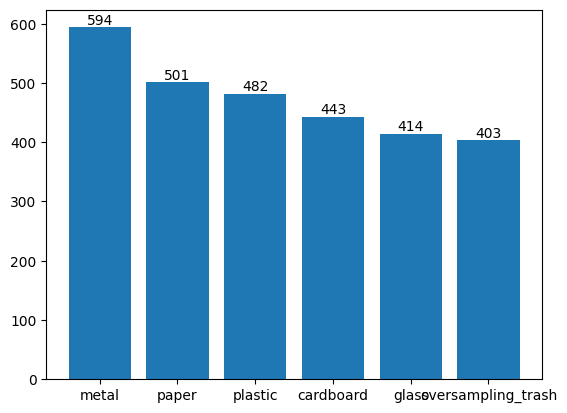

In [31]:
bar_chart2 = plt.bar(df['label'].unique(), df['label'].value_counts())
plt.bar_label(bar_chart2)
plt.show()

### Data Spliting

Splitting the dataset into training, validation, and testing subsets is a crucial step in machine learning to ensure the model is trained effectively and evaluated accurately. Here's the purpose of each split:
  - Training Data (70%): Used to train the model, allowing it to learn patterns and features in the data.
  - Testing Data (30%): Reserved for evaluating the final model’s performance on unseen data.

The chosen split ratio ensures the model has sufficient data for learning while keeping enough for validation and testing. This step sets the stage for robust training and reliable performance assessment.

In [32]:
import shutil
from sklearn.model_selection import train_test_split

In [33]:
# Define paths
original_dataset_dir = '/content/drive/My Drive/dataset-resized/'
base_dir = '/content/drive/My Drive/trash-dataset-split/'

In [34]:
os.makedirs(base_dir, exist_ok=True)

In [35]:
for split in ["train", "test"]:
    for category in os.listdir(original_dataset_dir):
        os.makedirs(os.path.join(base_dir, split, category), exist_ok=True)

# Split each class into train, val, and test
for category in os.listdir(original_dataset_dir):
    category_path = os.path.join(original_dataset_dir, category)
    images = os.listdir(category_path)

    # Check if the images list is empty before splitting
    if not images:
        print(f"Warning: No images found in {category_path}. Skipping split for this category.")
        continue

    train, test = train_test_split(images, test_size=0.3, random_state=42)

    # Move files to respective folders
    for image in train:
        shutil.copy(os.path.join(category_path, image), os.path.join(base_dir, "train", category))
    for image in test:
        shutil.copy(os.path.join(category_path, image), os.path.join(base_dir, "test", category))

print("Data split complete!")

Data split complete!


In [36]:
os.listdir(base_dir)

['train', 'test']

### Exploration after splitting

  This step ensures that the dataset splitting process was performed correctly and that each subset is well-distributed across all classes. Specifically, the following are analyzed **Image Counts per Split** and **Class Distribution in Each Split**. Check that each class is proportionally represented in all subsets to avoid introducing bias into the model training or evaluation.
  
  This step helps validate the integrity of the split, ensuring fair training and reliable validation and testing outcomes. Any imbalances detected at this stage can guide adjustments before proceeding further.

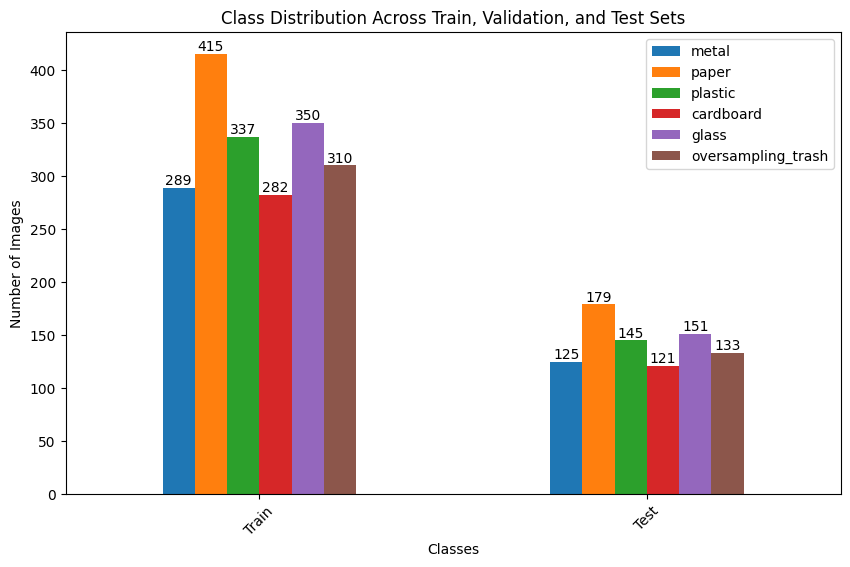

In [38]:
# Paths to train, val, and test directories
train_dir = "/content/drive/MyDrive/trash-dataset-split/train"
test_dir = "/content/drive/MyDrive/trash-dataset-split/test"

# Function to count images in each class
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count images in each set
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Train': train_counts,
    'Test': test_counts
}).transpose()

# Plot the class distribution
df.plot(kind='bar', figsize=(10, 6))
plt.title('Class Distribution Across Train, Validation, and Test Sets')
plt.ylabel('Number of Images')
plt.xlabel('Classes')
plt.xticks(rotation=45)
plt.bar_label(plt.gca().containers[0])
plt.bar_label(plt.gca().containers[1])
plt.bar_label(plt.gca().containers[2])
plt.bar_label(plt.gca().containers[3])
plt.bar_label(plt.gca().containers[4])
plt.bar_label(plt.gca().containers[5])
plt.show()

### Data Augmentation

Data augmentation is used to increase the variability of the dataset and prevent overfitting by artificially generating new, modified versions of the existing images. The following techniques are applied to the images:

- **Resize**: Adjusting the size of images to a consistent shape, ensuring compatibility with the model input requirements.
- **Rescale**: Normalizing pixel values to a consistent range, typically between 0 and 1, to improve model training stability.
- **Rotation**: Rotating images by random angles to create variations and make the model more invariant to orientation.
- **Zoom**: Applying random zooming to simulate closer or farther perspectives, helping the model generalize better across different scales.

These augmentations help the model become more robust and improve its ability to generalize to new, unseen data by providing diverse, transformed versions of the same images.

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize

# Define preprocessing pipeline for testing data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize

# Apply to training and validation data
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/trash-dataset-split/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


# Apply to testing data
test_generator = test_datagen.flow_from_directory(
    "/content/drive/MyDrive/trash-dataset-split/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for testing to keep predictions aligned with data
)


Found 1983 images belonging to 6 classes.
Found 854 images belonging to 6 classes.


## Modeling

In this step, the machine learning model is built using a Convolutional Neural Network (CNN), which is well-suited for image classification tasks. The CNN is trained using the prepared dataset, where it learns to recognize patterns and features in the images. The process includes:

- Training: The model learns from the training data by adjusting its weights to minimize the loss function.
- Testing: After training, the model is evaluated on a separate test set to assess its generalization ability to new, unseen data.
- Evaluation: The model's performance is further evaluated using metrics such as accuracy, precision, recall, and F1-score to understand how well it classifies the different classes of trash.

CNNs are particularly effective for image data because they automatically learn spatial hierarchies and patterns, making them highly suitable for this classification task.

### Build the model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tqdm import tqdm
from keras.layers import Conv2D, MaxPooling2D , BatchNormalization ,Dropout ,Flatten , Dense , Input , Rescaling , Resizing
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2

### Model 1 - CNN

In [ ]:
# Define the CNN model
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),  # Add Batch Normalization
    MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Flatten the feature map
    Flatten(),

    # Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization

    # Output Layer (6 classes for multi-class classification)
    Dense(6, activation='softmax')  # Use softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,630 (42.61 MB)

 Trainable params: 11,170,182 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-5)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # Start with more epochs, let early stopping handle the actual count
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 639s 9s/step - accuracy: 0.3111 - loss: 18.2232 - val_accuracy: 0.0554 - val_loss: 34.7760 - learning_rate: 0.0010
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 436s 6s/step - accuracy: 0.2855 - loss: 3.7398 - val_accuracy: 0.0554 - val_loss: 47.4269 - learning_rate: 0.0010
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 379s 6s/step - accuracy: 0.2459 - loss: 2.1167 - val_accuracy: 0.0554 - val_loss: 60.2633 - learning_rate: 0.0010
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 377s 6s/step - accuracy: 0.2345 - loss: 1.9415 - val_accuracy: 0.0633 - val_loss: 41.0010 - learning_rate: 0.0010
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 384s 6s/step - accuracy: 0.2202 - loss: 1.8048 - val_accuracy: 0.0818 - val_loss: 13.5367 - learning_rate: 2.0000e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 381s 6s/step - accuracy: 0.2215 - loss: 1.7632 - val_accuracy: 0.1029 - val_loss: 4.2488 - learning_rate: 2.0000e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 381s 6s/step - accuracy: 0.2453 - loss: 1.7514 - val_

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']

cnn = pd.DataFrame({'accuracy': accuracy, 'loss': loss})
cnn.tail(10)

In [ ]:
# cnn model 1
history = model.fit(
    train_generator,
    epochs=10,
    validation_data= val_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 846s 12s/step - accuracy: 0.2122 - loss: 1.8992 - val_accuracy: 0.2296 - val_loss: 1.7504
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 251s 4s/step - accuracy: 0.3124 - loss: 1.5837 - val_accuracy: 0.2533 - val_loss: 1.9039
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.3352 - loss: 1.5769 - val_accuracy: 0.2718 - val_loss: 1.8194
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.4387 - loss: 1.4044 - val_accuracy: 0.2929 - val_loss: 2.0811
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 259s 4s/step - accuracy: 0.4938 - loss: 1.3222 - val_accuracy: 0.3430 - val_loss: 2.1759
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - accuracy: 0.5056 - loss: 1.2714 - val_accuracy: 0.3325 - val_loss: 2.4909
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 252s 4s/step - accuracy: 0.5289 - loss: 1.2241 - val_accuracy: 0.3219 - val_loss: 2.1119
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.5399 - loss: 1.2264 - val_accuracy: 0.3325 - val_loss: 2

In [ ]:
model.save("cnn_trash_classification_model.h5")

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']

cnn = pd.DataFrame({'accuracy': accuracy, 'loss': loss})
cnn.tail(10)

,accuracy,loss
0,0.256526,1.753953
1,0.325803,1.571592
2,0.370482,1.514232
3,0.447791,1.384248
4,0.482932,1.338613
5,0.499498,1.271995
6,0.522590,1.252261
7,0.537149,1.238903
8,0.528614,1.242952
9,0.531124,1.252145


### Model 2 - CNN MobileNet v2

  MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices. It is based on an inverted residual structure where the residual connections are between the bottleneck layers. The intermediate expansion layer uses lightweight depthwise convolutions to filter features as a source of non-linearity. As a whole, the architecture of MobileNetV2 contains the initial fully convolution layer with 32 filters, followed by 19 residual bottleneck layers.

  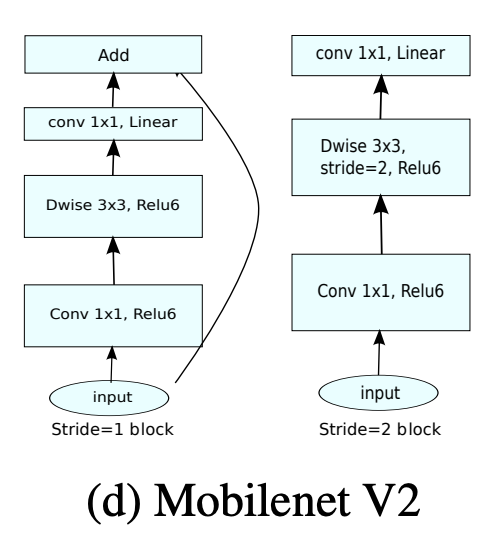


In [6]:
Model = Sequential([
    MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3)),
    Flatten(),
    Dense(64,activation='relu'),
    BatchNormalization(),
    Dropout(0.08),
    Dense(6 ,activation='softmax')])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
preTrainedModel = Model.layers[0]
for layer in preTrainedModel.layers[:-4]:
    layer.trainable = False

In [8]:
Model.compile(optimizer='adam',loss='categorical_crossentropy' ,metrics=['accuracy'])

#### Early stop patient 4

In [ ]:
history = Model.fit(train_generator,
                    validation_data = val_generator,
                    epochs=50,
                    verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                                       patience=4,
                                       monitor='val_accuracy',
                                       restore_best_weights=True)])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 556s 8s/step - accuracy: 0.5321 - loss: 1.4158 - val_accuracy: 0.3298 - val_loss: 6.1704
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.7594 - loss: 0.6493 - val_accuracy: 0.3879 - val_loss: 5.1945
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8282 - loss: 0.4707 - val_accuracy: 0.4591 - val_loss: 4.8325
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8339 - loss: 0.4423 - val_accuracy: 0.4011 - val_loss: 5.1492
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8476 - loss: 0.4107 - val_accuracy: 0.4090 - val_loss: 5.1582
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8623 - loss: 0.3739 - val_accuracy: 0.4301 - val_loss: 4.4280
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8759 - loss: 0.3400 - val_accuracy: 0.4776 - val_loss: 4.4396
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.8861 - loss: 0.3173 - val_accuracy: 0.4380 - val_loss: 5.

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']

cnn = pd.DataFrame({'accuracy': accuracy, 'loss': loss})
cnn.tail(10)

,accuracy,loss
1,0.772088,0.622041
2,0.813755,0.503027
3,0.838855,0.430794
4,0.847892,0.410495
5,0.861948,0.383442
6,0.873494,0.346290
7,0.889056,0.310011
8,0.901606,0.280084
9,0.905622,0.263584
10,0.903112,0.263178


In [ ]:
Model.save("cnn_trash_classification_model.h5")

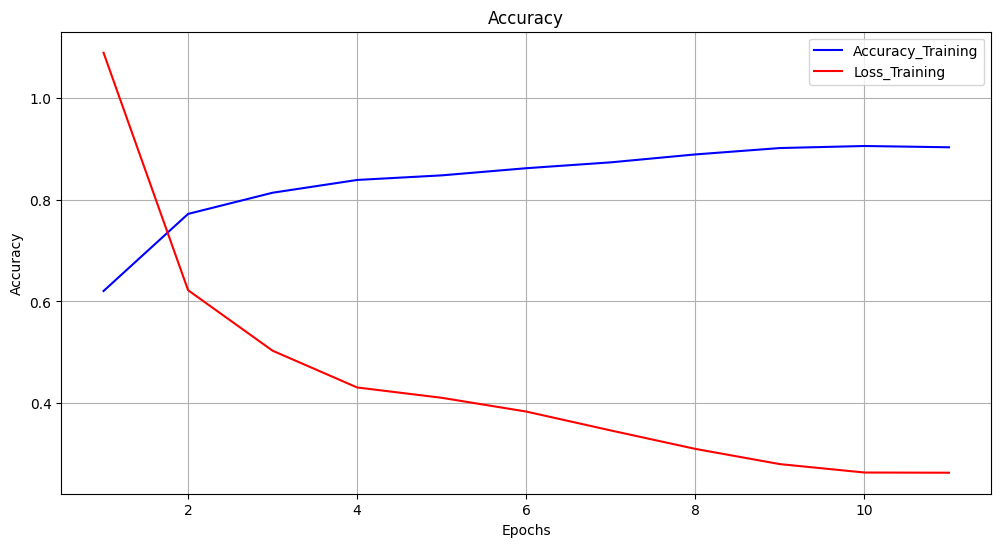

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'accuracy' and 'loss' are already defined from your training history

# Get the actual number of epochs from the accuracy list
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, 'b-', label='Accuracy_Training')
plt.plot(epochs, loss, 'r-', label='Loss_Training')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

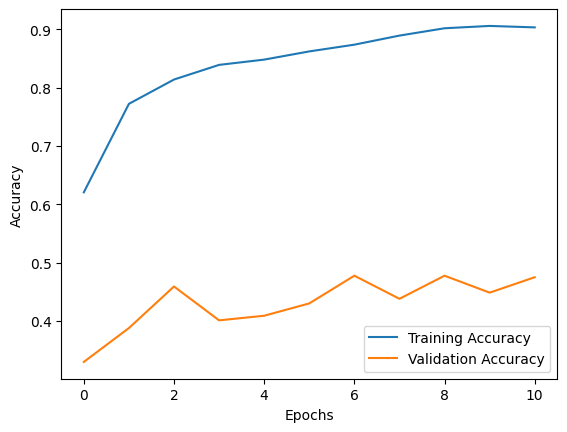

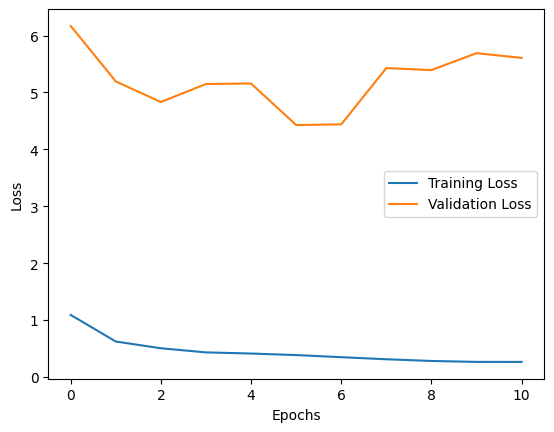

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### Early stop patient 5

Training

In [9]:
history = Model.fit(train_generator,
                    validation_data = test_generator,
                    epochs=50,
                    verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                                       patience=5,
                                       monitor='val_accuracy',
                                       restore_best_weights=True)])

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 763s 11s/step - accuracy: 0.5515 - loss: 1.3716 - val_accuracy: 0.7190 - val_loss: 1.0247
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 37s 546ms/step - accuracy: 0.7491 - loss: 0.6951 - val_accuracy: 0.7143 - val_loss: 0.9199
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 547ms/step - accuracy: 0.8019 - loss: 0.5341 - val_accuracy: 0.7564 - val_loss: 0.7435
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 540ms/step - accuracy: 0.8128 - loss: 0.5309 - val_accuracy: 0.8173 - val_loss: 0.5737
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 38s 521ms/step - accuracy: 0.8526 - loss: 0.4110 - val_accuracy: 0.8115 - val_loss: 0.6352
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 36s 524ms/step - accuracy: 0.8657 - loss: 0.3768 - val_accuracy: 0.7775 - val_loss: 0.7478
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 42s 546ms/step - accuracy: 0.8811 - loss: 0.3368 - val_accuracy: 0.7998 - val_loss: 0.6051
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 549ms/step - accuracy: 0.8743 - loss: 0.3392 - val_accuracy: 0.8279

In [10]:
accuracy = history.history['accuracy']
loss = history.history['loss']

cnn = pd.DataFrame({'accuracy': accuracy, 'loss': loss})
cnn.tail(10)

,accuracy,loss
25,0.937973,0.176452
26,0.949067,0.151749
27,0.955119,0.137027
28,0.953606,0.122689
29,0.953606,0.129094
30,0.952093,0.138914
31,0.957640,0.135928
32,0.955119,0.124397
33,0.961674,0.116594
34,0.954614,0.127195


In [11]:
Model.save("trash_classification.h5")

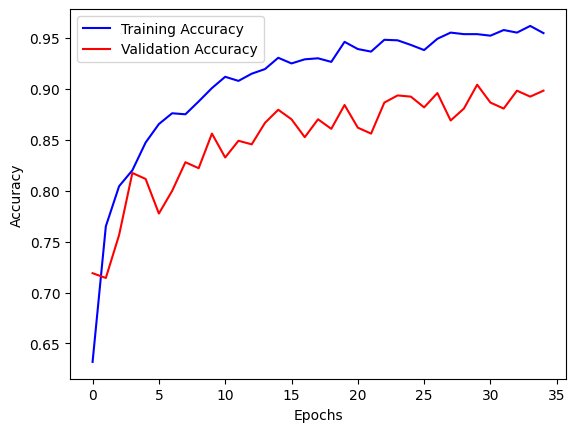

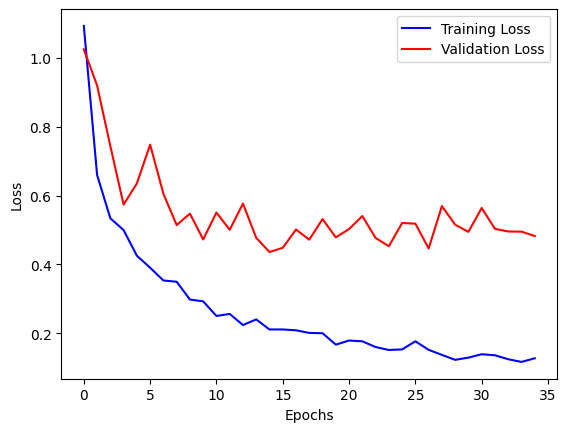

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], 'b-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Model 3

In [ ]:
#  CNN model 2

cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(
    filters = 32, kernel_size = 3,
    activation = 'relu',
    input_shape = (224,224,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 6, activation = 'softmax')) # Changed units to 6 and activation to softmax
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) # Changed loss to categorical_crossentropy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = cnn.fit(
    train_generator,
    epochs=10,
    validation_data= val_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 551s 8s/step - accuracy: 0.1907 - loss: 4.0336 - val_accuracy: 0.1794 - val_loss: 1.7996
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 196s 3s/step - accuracy: 0.3344 - loss: 1.6001 - val_accuracy: 0.2797 - val_loss: 1.9912
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.3891 - loss: 1.4737 - val_accuracy: 0.2243 - val_loss: 1.8803
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.4333 - loss: 1.3953 - val_accuracy: 0.2322 - val_loss: 1.8124
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.4898 - loss: 1.2983 - val_accuracy: 0.2665 - val_loss: 2.0413
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.4497 - loss: 1.3549 - val_accuracy: 0.3193 - val_loss: 1.9183
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.4524 - loss: 1.4105 - val_accuracy: 0.3298 - val_loss: 1.9739
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.4634 - loss: 1.3774 - val_accuracy: 0.2665 - val_loss: 2.

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']

cnn = pd.DataFrame({'accuracy': accuracy, 'loss': loss})
cnn.tail(10)

,accuracy,loss
0,0.239458,2.436384
1,0.343374,1.569776
2,0.409639,1.444193
3,0.441265,1.395567
4,0.492470,1.315588
5,0.409137,1.428745
6,0.446285,1.437051
7,0.474398,1.363992
8,0.482430,1.346485
9,0.514558,1.263432


In [ ]:
cnn = tf.keras.models.Sequential([
    Input(shape=(224, 224, 3)),  # Define the input shape explicitly
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='softmax')  # Assuming multi-class classification
])
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
history = cnn.fit(
    train_generator,
    epochs=10,
    validation_data= val_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 566s 8s/step - accuracy: 0.2027 - loss: 2.3759 - val_accuracy: 0.1662 - val_loss: 1.8713
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 223s 3s/step - accuracy: 0.3246 - loss: 1.5663 - val_accuracy: 0.2084 - val_loss: 1.9121
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.3903 - loss: 1.4926 - val_accuracy: 0.2137 - val_loss: 2.0001
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.4341 - loss: 1.3980 - val_accuracy: 0.3061 - val_loss: 2.3258
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.4555 - loss: 1.4176 - val_accuracy: 0.2902 - val_loss: 1.9044
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.4901 - loss: 1.2986 - val_accuracy: 0.3087 - val_loss: 1.9276
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.4875 - loss: 1.3046 - val_accuracy: 0.3087 - val_loss: 2.1392
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 207s 3s/step - accuracy: 0.5040 - loss: 1.2536 - val_accuracy: 0.2823 - val_loss: 2.

### Evaluation

Evaluation is crucial to determine how well the trained model performs on unseen data. In this step, the model is tested on the reserved testing dataset, and its performance is assessed using various metrics, including:

- Accuracy: Measures the percentage of correctly classified images.
- Precision: Evaluates how many of the positive predictions are correct.
- Recall: Assesses how well the model identifies all relevant instances.
- F1-Score: Provides a harmonic mean of precision and recall for balanced evaluation.

#### Model 1 - CNN

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("/content/trash_classification.h5")

# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 105s 9s/step - accuracy: 0.7051 - loss: 2.5490
Test Loss: 5.1905
Test Accuracy: 0.4635


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.96      0.87      0.91        61
       glass       0.78      0.87      0.82        76
       metal       0.87      0.83      0.85        63
       paper       0.12      0.01      0.02        90
     plastic       0.02      0.03      0.02        73
       trash       0.06      0.19      0.09        21

    accuracy                           0.46       384
   macro avg       0.47      0.47      0.45       384
weighted avg       0.48      0.46      0.46       384



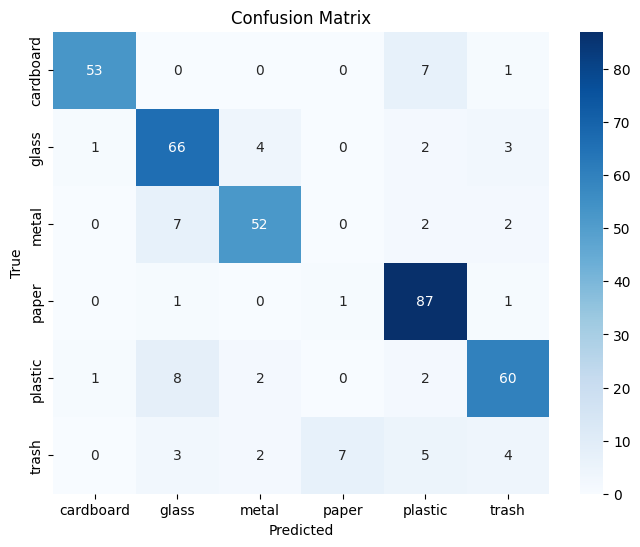

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels and predictions from the test generator
y_true = test_generator.classes
y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a single image for testing
img_path = "/content/drive/MyDrive/split/test/paper/paper1.jpg"  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

# Make prediction
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions[0])  # Get the class with highest probability

print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: 5
Class Probabilities: [[0.1358134  0.00438217 0.00835587 0.06250051 0.14169186 0.64725614]]


#### Model 2 - CNN Mobilenetv2

In [13]:
from tensorflow.keras.models import load_model

loaded_model = load_model("/content/trash_classification.h5")

# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 183ms/step - accuracy: 0.8926 - loss: 0.5696
Test Loss: 0.4945
Test Accuracy: 0.9040


27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 256ms/step
Classification Report:
                    precision    recall  f1-score   support

         cardboard       0.95      0.91      0.93       121
             glass       0.93      0.83      0.88       151
             metal       0.85      0.90      0.88       125
oversampling_trash       0.97      0.95      0.96       133
             paper       0.87      0.97      0.92       179
           plastic       0.88      0.84      0.86       145

          accuracy                           0.90       854
         macro avg       0.91      0.90      0.90       854
      weighted avg       0.91      0.90      0.90       854



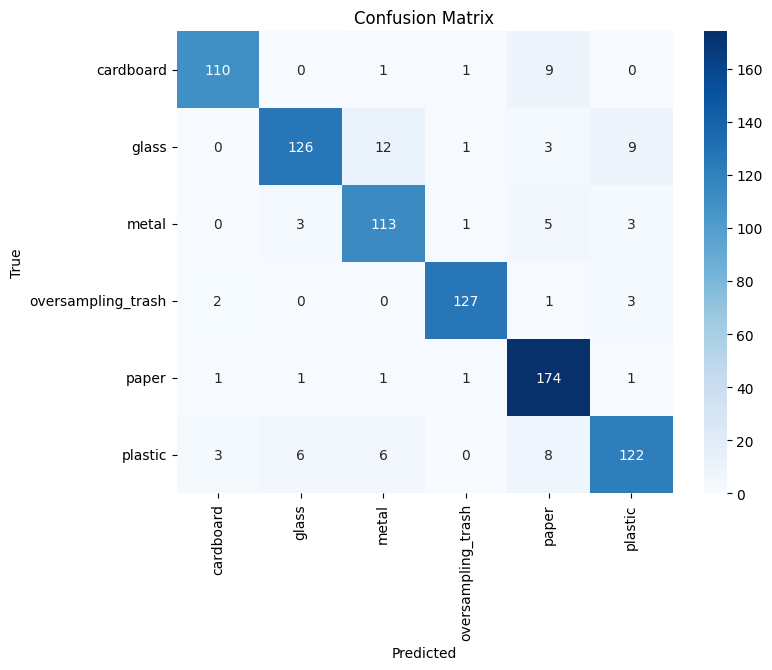

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get true labels and predictions from the test generator
y_true = test_generator.classes
y_pred = loaded_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a single image for testing
img_path = "test.jpg"  # Replace with the path to your test image
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

# Make prediction
predictions = loaded_model.predict(img_array)
predicted_class = np.argmax(predictions[0])  # Get the class with highest probability

print(f"Predicted Class: {predicted_class}")
print(f"Class Probabilities: {predictions}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted Class: 0
Class Probabilities: [[9.9999583e-01 1.6411924e-09 5.1112615e-08 1.7563060e-08 4.1357930e-06
  3.4241407e-10]]


In [16]:
train_generator.class_indices

{'cardboard': 0,
 'glass': 1,
 'metal': 2,
 'oversampling_trash': 3,
 'paper': 4,
 'plastic': 5}

## Conclussion

Based on the project that been build, the best model for classification trash is CNN with architecture Mobilenet v2. Which is, reach 95% accuracy tarining and 90% accuracy testing.